# Logistic Regression

Just when we thought we were done with regression, it pulls us back in!

## What we will accomplish

In this notebook we will:
- Learn the logistic regression algorithm,
- Show how you can interpret logistic regression output,
- Talk about classification cutoffs and
- Think about predicting probabilities instead of hard classification.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## The algorithm

We will be using logistic regression for binary classification, classification problems with only two classes typically coded as $0$ or $1$. Normally the class denoted as $1$ is something we want to identify, for example someone that has a disease or someone that qualifies for a loan. 

<i>Note that logistic regression can be adapted to multi-class classification, but we will focus on that in another notebook.</i>

### From binary to continuous

<i>Logistic regression is a form of statistical regression algorithm.</i> It turns out that this may be somewhat of a controversial statement... <a href="https://twitter.com/TenanATC/status/1386332061087277057?s=20">https://twitter.com/TenanATC/status/1386332061087277057?s=20</a>, but it is important to remember that it is in fact a statistical regression technique used to solve classification problems in supervised learning.

Remember that regression algorithms are usually used to predict continuous outcomes, but binary classification is in no way continuous. This is where logisitic regression is a little clever, instead of modeling the output class, it models the probability that a particular data point is an instance of class $1$.

Let's dive in with some random data. 

In [2]:
## Load in the randomly generated data
data = np.loadtxt("../../../Data/random_binary.csv",delimiter = ",")
X = data[:,0]
y = data[:,1]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2,
                                                       stratify=y)

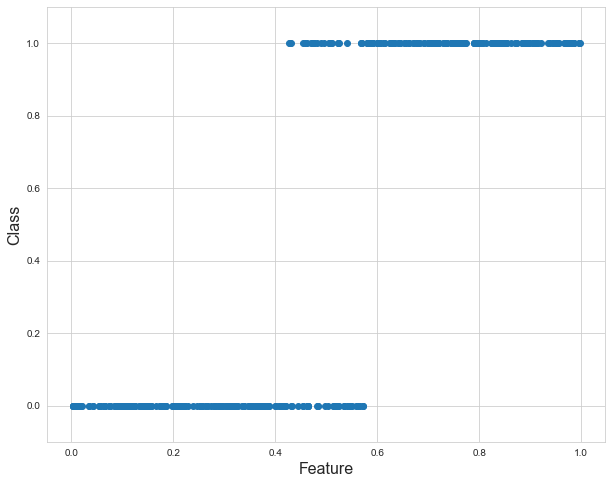

In [5]:
plt.figure(figsize = (10,8))

plt.scatter(X_train,y_train)
plt.ylim((-.1,1.1))
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("Class",fontsize = 16)

plt.show()

While the vertical axis of the above plot says "Class" we could just as easily label it the "Probability the instance is $1$". In this case since we know the class of each data point in the training set, the probability can only be $0$ or $1$. Now suppose you have a new data point for which you only have the vector of predictors, $X$. We are interested in the probability that this data point has class $y=1$, call this probability $P(y=1|X) = p(X)$. $p(X)$ can take on all values in $[0,1]$. Attempting to estimate $p(X)$ takes us back to the realm of regression problems.

The way we model the probability in logistic regression is with a sigmoidal curve, the general form looks like this:
$$
f(x) = \frac{1}{1+e^{-x}}.
$$
A graph of the curve this function produces is shown below.

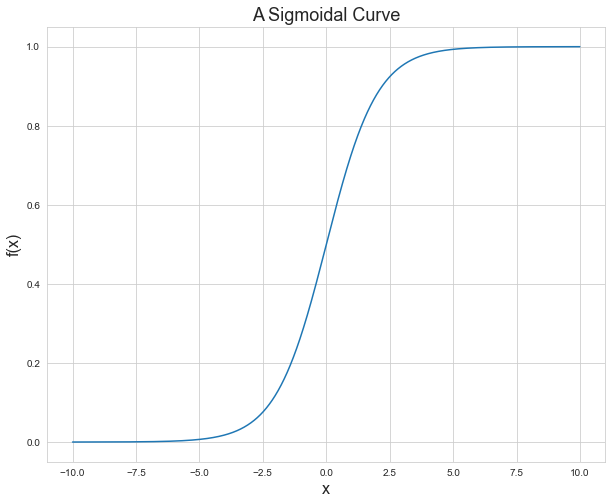

In [6]:
x = 10

plt.figure(figsize = (10,8))

plt.plot(np.arange(-x,x,.01),1/(1+np.exp(-np.arange(-x,x,.01))))


plt.xlabel("x",fontsize = 16)
plt.ylabel("f(x)",fontsize = 16)

plt.title("A Sigmoidal Curve", fontsize=18)

plt.show()

Notice that this function stays between $0$ and $1$. Also like our phony data it transitions from class $0$, to class $1$ in a continuous manner. This is the function type we would like to use as our model.

The model that is used in logistic regression is:
$$
p(X) = \frac{1}{1 + e^{-X\beta}},
$$
where $\beta = \left(\beta_0,\beta_1,\dots,\beta_m\right)^T$ is a column vector of coefficients, $X$ has been extended to include a column of ones.

The model is fit using the statistical method of maximum likelihood estimators (for a derivation of the loss function see the practice problems on logistic regression).

Let's see how to use `sklearn` to fit a logistic regression model to our phony data, then see how we can use it for classification.

Logistic regression can be implemented in `sklearn` with `LogisticRegression`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html</a>.

In [7]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [13]:
## make model object
log_reg = LogisticRegression(penalty='none')

## fit the model
log_reg.fit(X_train.reshape(-1,1),
               y_train)

LogisticRegression(penalty='none')

In [14]:
## Demonstrate predict
log_reg.predict(X_train.reshape(-1,1))

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0.

In [15]:
## Demonstrate predict_proba
log_reg.predict_proba(X_train.reshape(-1,1))

## column 1 here, is p(X) = P(y=1 | X)

array([[3.57298927e-03, 9.96427011e-01],
       [1.20774825e-03, 9.98792252e-01],
       [9.99931606e-01, 6.83940586e-05],
       [1.10418960e-04, 9.99889581e-01],
       [9.99990714e-01, 9.28616565e-06],
       [3.79817094e-05, 9.99962018e-01],
       [1.41273271e-03, 9.98587267e-01],
       [9.77478293e-01, 2.25217072e-02],
       [9.47051229e-01, 5.29487707e-02],
       [2.40207505e-05, 9.99975979e-01],
       [9.97612221e-01, 2.38777891e-03],
       [9.98794264e-01, 1.20573559e-03],
       [6.01196904e-04, 9.99398803e-01],
       [7.64821781e-01, 2.35178219e-01],
       [1.89079853e-04, 9.99810920e-01],
       [9.99602597e-01, 3.97402942e-04],
       [6.67653224e-01, 3.32346776e-01],
       [6.28056376e-01, 3.71943624e-01],
       [9.71168232e-01, 2.88317680e-02],
       [5.88305683e-03, 9.94116943e-01],
       [5.02945001e-04, 9.99497055e-01],
       [9.99925590e-01, 7.44095313e-05],
       [9.89038494e-01, 1.09615064e-02],
       [9.88127675e-01, 1.18723254e-02],
       [9.999673

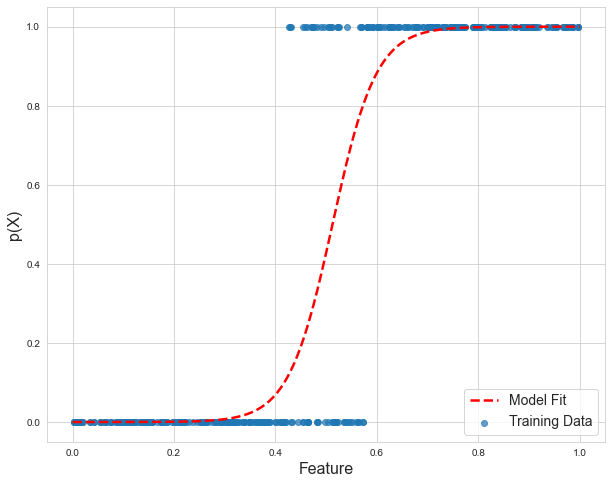

In [16]:
# Plot figure 
plt.figure(figsize = (10,8))

# With classifications we have a new method
# predict_proba which returns the probability
# that an observation is a certain class.
plt.plot(np.linspace(0,1,1000),
            log_reg.predict_proba(np.linspace(0,1,1000).reshape(-1,1))[:,1],
            'r--',linewidth=2.5,label = "Model Fit")
plt.scatter(X_train,y_train,label = 'Training Data',alpha=.7)
plt.legend(fontsize = 14,loc = 4)
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("p(X)",fontsize=16) 

plt.show()

### From probabilities to classifications

The standard approach to generate classifications is to choose a probability cutoff, for instance if $p(X) \geq .5$ we classify the instance as $1$, otherwise we say it is a $0$. This is an example of a <i>decision boundary</i>, any point to the left of the boundary gets classified as a $0$, on the right a $1$. Decision boundaries are a big part of many classification algorithms, so this won't be the last time we see them.

In [17]:
## set the cutoff
cutoff = .4

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]

## assign the value based on the cutoff
y_train_pred = 1*(y_prob >= cutoff)

## print the accuracy
## input the accuracy after "is",
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred == y_train)/len(y_train))

The training accuracy for a cutoff of 0.4 is 0.92


In [18]:
## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

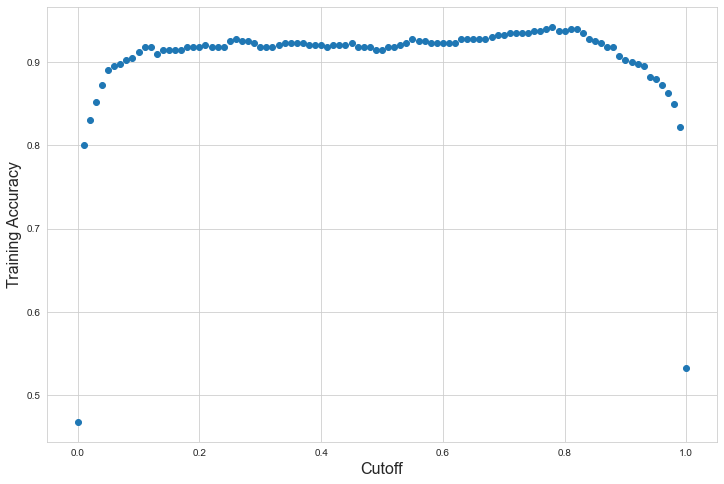

In [19]:
plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

While we produced this plot using the training data, in practice we would use a validation set or cross-validation to select a probability cutoff.

## Interpreting logistic regression

One nice thing about this algorithm is that we can interpret the results. This is always a nice feature of an algorithm.

Reconsider the statistical model that we fit:
$$
p(X) = \frac{1}{1 + e^{- X \beta}}.
$$
Rearranging this equation we find the following:
$$
\log\left(\frac{p(X)}{1-p(X)}\right) =  X \beta.
$$
The expression $p(X)/(1-p(X))$ is known as the odds of the event $y=1$. So the statistical model for logistic regression is really just a linear model for the $\log$ odds of being class $1$. This allows us to interpret the coefficients of our model.

Look at the model we just fit:
$$
\log\left(\frac{p(x)}{1-p(x)}\right) = \beta_0 + \beta_1 x, \text{ or } \text{Odds}|x = C e^{\beta_1 x}
$$
where $x$ is the feature, and $C$ is some constant we do not care about. 

So if we increase $x$ from say $d$ to $d+1$, a $1$ unit increase, then our odds are $e^{\beta_1}$ units times larger (or smaller depending on the value of $\beta_1$), we can see this below:
$$
\frac{\text{Odds}|x = d+1}{\text{Odds}|x=d} = \frac{e^{\beta_1 (d+1)}}{e^{\beta_1 d}} = e^{\beta_1}
$$

Let's look at the coefficient from our phony data logistic regression and interpret it.

In [ ]:
## demonstrate log_reg.coef_


In [ ]:
print("A .1 unit increase in our feature multiplies" + 
      " the odds of being classified as 1 by " + 
      str(np.round(np.exp(.1*log_reg.coef_[0][0]),2)))

### Algorithm Assumptions

While we were explaining the concept of logistic regression, we did not mention any of the assumptions of the algorithm. Let's talk about that here before we move on to real data.

- Each sample must be independent from all other samples,
- When using multiple predictors, they should not be correlated,
- The log odds depend linearly on the predictors and
- Logistic regression should have a largish data set to work with.

We did not worry about these assumptions in this notebook because the data were randomly generated to fit these assumptions. However, in real world applications you may want check them when deciding whether or not logistic regression is a good model choice. 

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)